In [1]:
%matplotlib notebook
import numpy as np
import helpers
import pandas as pd
import matplotlib as mpl

mpl.rcParams['figure.max_open_warning'] = 30

# load container for plotting
evoked = helpers.load_evoked_container()

Reading data/meg_final_data/evoked_hfreq10.0_sfreq100.0_window0.40-0.70_mag-ave.fif ...
    Read a total of 6 projection items:
        grad_ssp_upright2.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright2.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright2.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright2.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright2.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright2.fif : PCA-v3 (1 x 306)  idle
    Found the data of interest:
        t =     400.00 ...     700.00 ms (Unknown)
        0 CTF compensation matrices available
        nave = 480 - aspect type = 100
No baseline correction applied


In [2]:
# plotting function
times=np.linspace(0.4, 0.7, 8)
def plot_topo(data, times=np.linspace(0.4, 0.7, 8), scale=1, 
              vmin=None, vmax=None, cmap=None, unit=None):
    
    for reg in data.columns:
        evoked.data = data[reg].values.reshape(evoked.data.shape)
        evoked.comment = reg
    
        fig = evoked.plot_topomap(times, scale=scale, vmin=vmin, vmax=vmax, 
                                  cmap=cmap, unit=unit, image_interp='nearest', 
                                  title=reg)
        fig.set_label(reg)

# ADVI

In [3]:
second_level_advi = pd.read_hdf(helpers.resultsdir + '/meg_hierarchical_advi.h5', 'second_level')

In [4]:
second_level_advi.xs('mlog10p', axis=1, level='measure').describe()

regressor,dot_y,entropy,intercept,logpost_left,surprise,trial_time
count,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000
mean,1.031662,1.240718,1.212909,1.334819,0.862730,0.762345
std,0.895671,1.153511,1.022169,1.437122,0.645480,0.432218
min,0.301546,0.301105,0.301081,0.301059,0.301177,0.301062
25%,0.483231,0.517036,0.513174,0.504915,0.434361,0.443646
50%,0.727711,0.868203,0.863078,0.830091,0.636205,0.636716
75%,1.246646,1.494693,1.544428,1.522857,1.060137,0.954283
max,7.845886,9.312353,8.666034,13.644960,5.429320,2.963461


## 'posterior t-values'

<IPython.core.display.Javascript object>


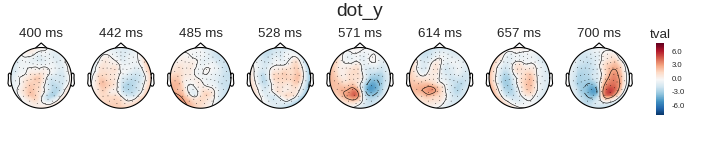

<IPython.core.display.Javascript object>


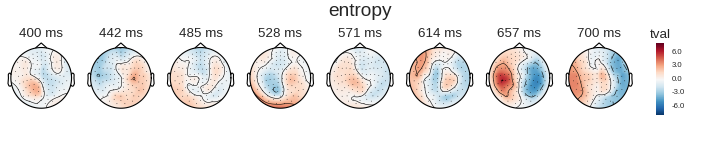

<IPython.core.display.Javascript object>


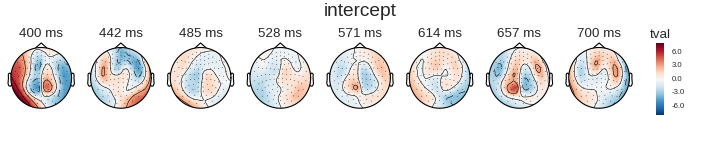

<IPython.core.display.Javascript object>


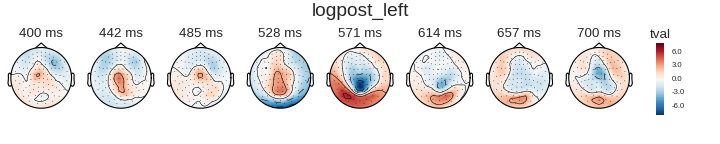

<IPython.core.display.Javascript object>


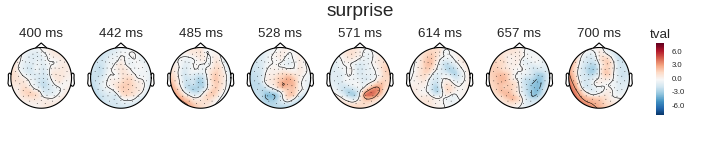

<IPython.core.display.Javascript object>


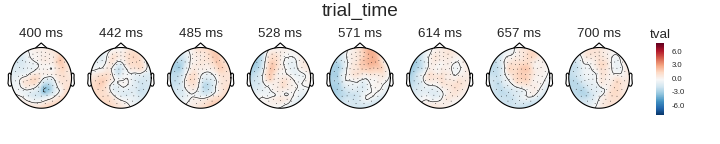

In [5]:
data = (second_level_advi.xs('mean', axis=1, level='measure')  / 
        second_level_advi.xs('std', axis=1, level='measure'))

plot_topo(data, times, vmin=-8, vmax=8, unit='tval')

# Summary statistic approach

In [6]:
second_level = pd.read_hdf(helpers.resultsdir + '/meg_hierarchical_ss.h5', 'second_level')

In [7]:
second_level.xs('mlog10p', axis=1, level='measure').describe()

regressor,dot_y,entropy,intercept,logpost_left,surprise,trial_time
count,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000
mean,0.890638,0.878519,0.862816,1.137986,0.719266,0.589539
std,0.964177,0.968680,0.885133,1.293683,0.790991,0.556023
min,0.000522,0.000135,0.000498,0.000281,0.000123,0.000399
25%,0.222144,0.221898,0.211784,0.252516,0.176434,0.174901
50%,0.564182,0.541096,0.579542,0.678801,0.430729,0.419708
75%,1.211604,1.193168,1.233477,1.505301,0.982718,0.840543
max,6.503528,8.730784,5.798568,8.719796,5.491009,3.532959


## t-values
Note that these are not exactly the t-values underlying the negative log10 p-values stored in second_level, because scipy.stats uses a different denominator when computing variances and standard deviations than the default used by numpy (N-1 in scipy.stats vs. N in numpy default).

<IPython.core.display.Javascript object>


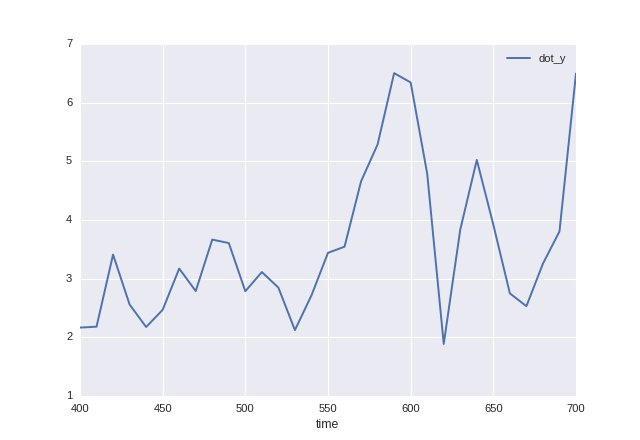

In [8]:
second_level.xs('mlog10p', axis=1, level='measure').max(level='time').plot(y='dot_y')

<IPython.core.display.Javascript object>


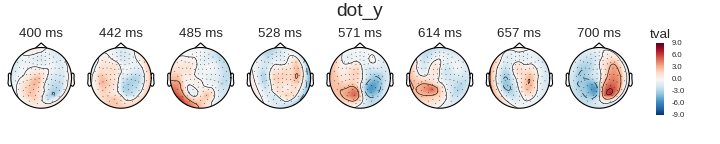

<IPython.core.display.Javascript object>


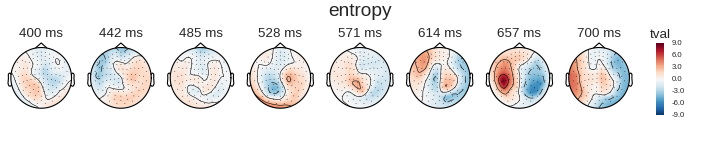

<IPython.core.display.Javascript object>


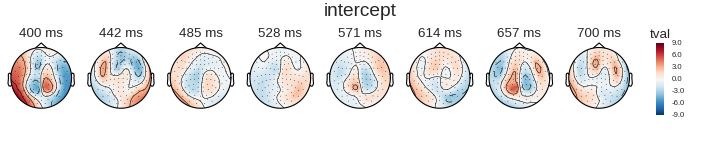

<IPython.core.display.Javascript object>


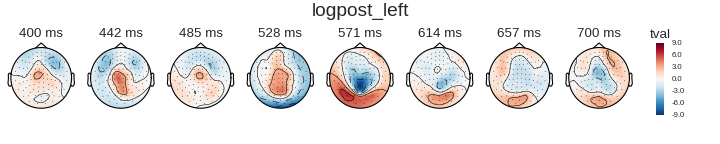

<IPython.core.display.Javascript object>


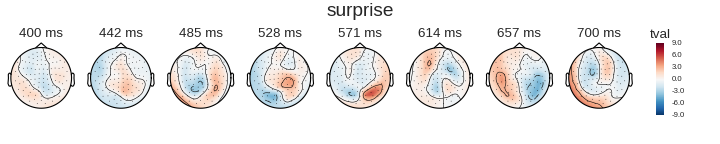

<IPython.core.display.Javascript object>


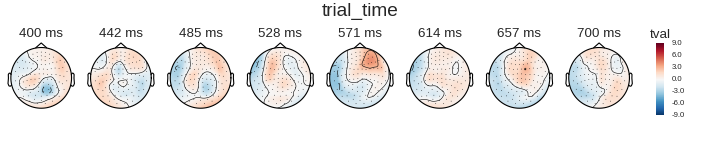

In [9]:
data = (second_level.xs('mean', axis=1, level='measure')  / 
        second_level.xs('std', axis=1, level='measure') * np.sqrt(34))

plot_topo(data, times, vmin=-9, vmax=9, unit='tval')

## Estimated mean parameter values

<IPython.core.display.Javascript object>


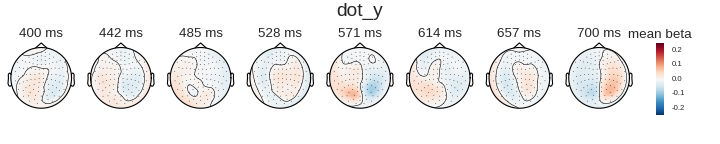

<IPython.core.display.Javascript object>


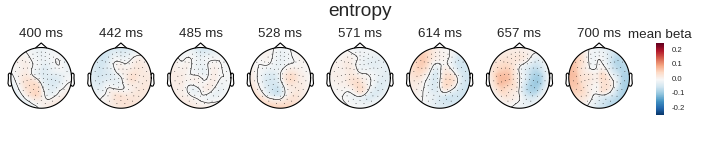

<IPython.core.display.Javascript object>


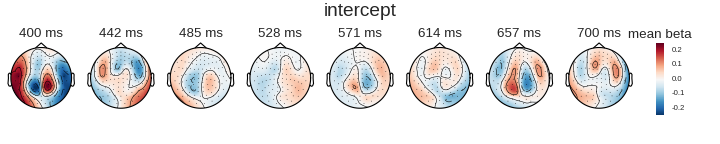

<IPython.core.display.Javascript object>


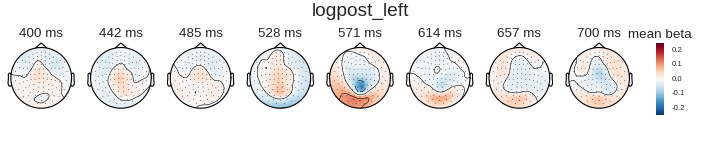

<IPython.core.display.Javascript object>


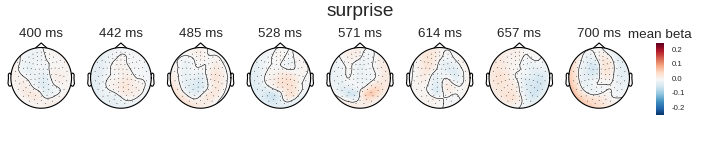

<IPython.core.display.Javascript object>


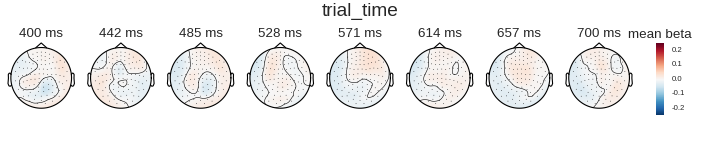

In [10]:
plot_topo(second_level.xs('mean', axis=1, level='measure'), 
          times, vmin=-0.2, vmax=0.2, unit='mean beta')

## Between-subject standard deviation

<IPython.core.display.Javascript object>


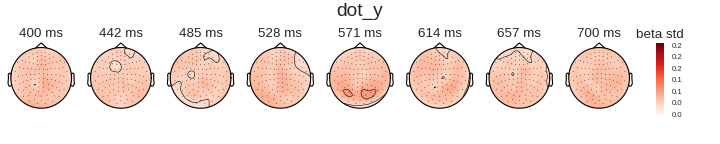

<IPython.core.display.Javascript object>


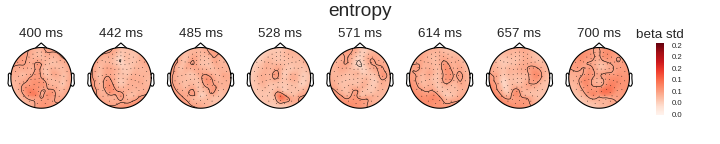

<IPython.core.display.Javascript object>


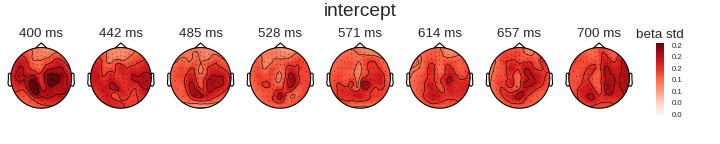

<IPython.core.display.Javascript object>


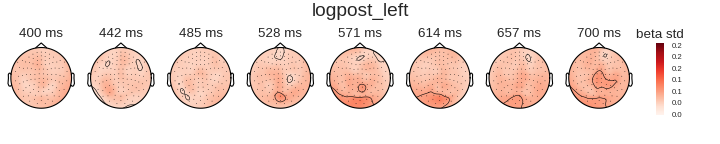

<IPython.core.display.Javascript object>


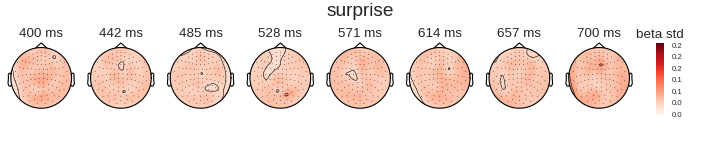

<IPython.core.display.Javascript object>


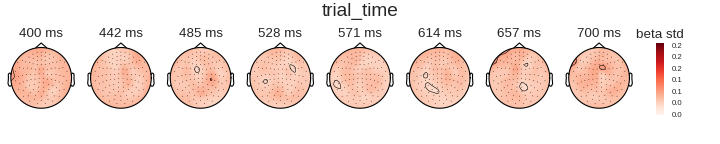

In [11]:
plot_topo(second_level.xs('std', axis=1, level='measure'), 
          times, vmin=0, vmax=0.25, unit='beta std')

# Permuted summary statistic approach

In [12]:
second_level_perm = pd.read_hdf(helpers.resultsdir + 
                                '/meg_hierarchical_ss_permuted.h5', 'second_level')
second_level_perm2 = pd.read_hdf(helpers.resultsdir + 
                                '/meg_hierarchical_ss_permuted2.h5', 'second_level')

In [13]:
second_level_perm.xs('mlog10p', axis=1, level='measure').describe()

regressor,dot_y,entropy,intercept,logpost_left,surprise,trial_time
count,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000
mean,0.516370,0.545756,0.879877,0.519654,0.529258,0.458083
std,0.528680,0.555311,0.919328,0.520619,0.547761,0.463411
min,0.000158,0.000160,0.000049,0.000080,0.000150,0.000360
25%,0.143025,0.143290,0.223644,0.151839,0.141936,0.136404
50%,0.342957,0.366848,0.567625,0.360262,0.355832,0.318403
75%,0.716956,0.784565,1.241676,0.721215,0.740070,0.634899
max,4.194814,4.280823,5.857420,4.209015,6.240586,3.758868


## time-courses of maximum log10p-values

<IPython.core.display.Javascript object>


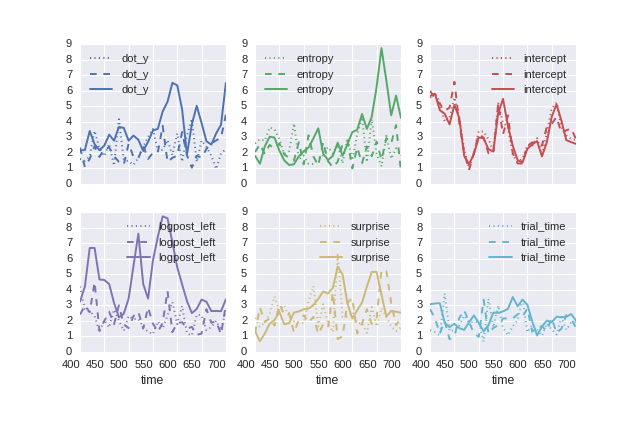

In [14]:
# trials permuted
ax = second_level_perm.xs('mlog10p', axis=1, level='measure').max(level='time').plot(
    subplots=True, layout=[2, 3], style=[':']*6, ylim=[0, 9])
# trials permuted2
second_level_perm2.xs('mlog10p', axis=1, level='measure').max(level='time').plot(
    ax=ax, subplots=True, style=['--']*6, ylim=[0, 9]);
# trials not permuted
second_level.xs('mlog10p', axis=1, level='measure').max(level='time').plot(
    ax=ax, subplots=True, ylim=[0, 9]);

## t-values

<IPython.core.display.Javascript object>


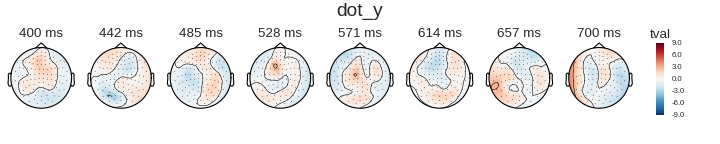

<IPython.core.display.Javascript object>


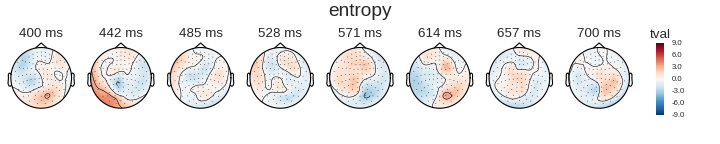

<IPython.core.display.Javascript object>


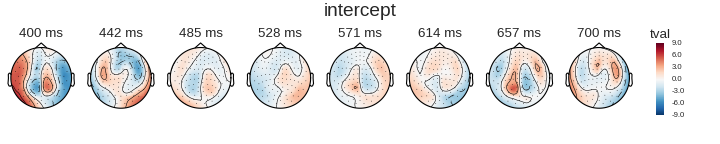

<IPython.core.display.Javascript object>


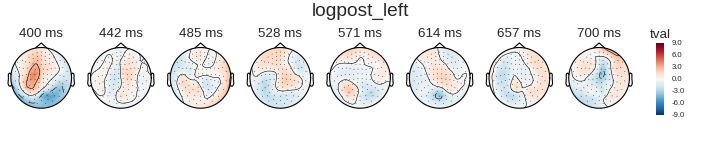

<IPython.core.display.Javascript object>


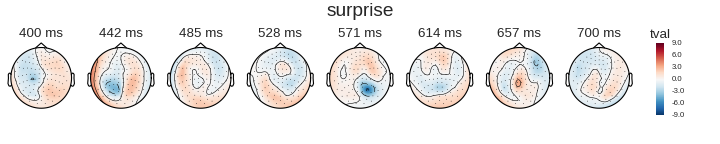

<IPython.core.display.Javascript object>


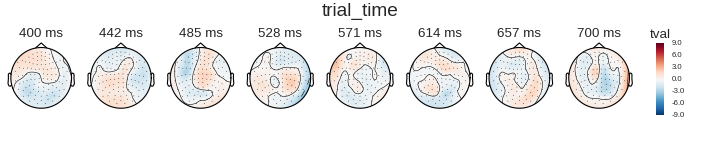

In [18]:
data = (second_level_perm.xs('mean', axis=1, level='measure')  / 
        second_level_perm.xs('std', axis=1, level='measure') * np.sqrt(34))

plot_topo(data, times, vmin=-9, vmax=9, unit='tval')